Time Series Analysis with TensorFlow
This notebook demonstrates how to use TensorFlow for time series analysis. We'll:
1. Generate synthetic time series data (sine wave with noise).
2. Build a neural network to denoise the data.
3. Train the model and evaluate its performance.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, UpSampling1D


Generate Synthetic Data

In [3]:
np.random.seed(42)
timesteps = 1000
time = np.arange(0, timesteps, 1)
signal = np.sin(2 * np.pi * 0.01 * time)  # Sine wave with frequency 0.01 Hz
noise = 0.5 * np.random.normal(size=timesteps)  # Gaussian noise
noisy_signal = signal + noise

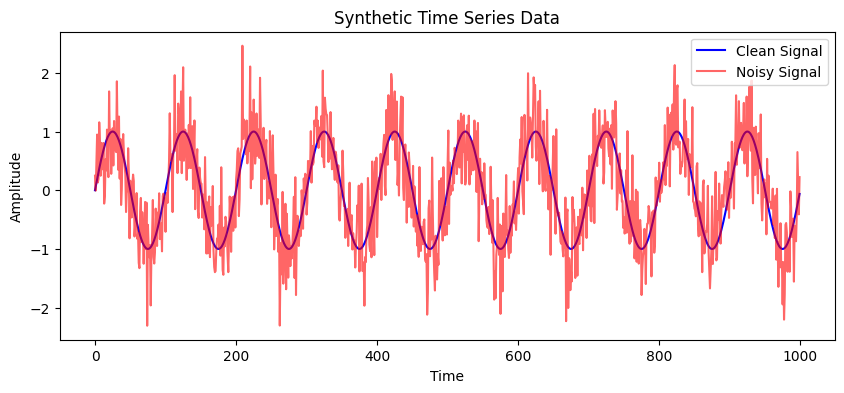

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(time, signal, label="Clean Signal", color="blue")
plt.plot(time, noisy_signal, label="Noisy Signal", color="red", alpha=0.6)
plt.title("Synthetic Time Series Data")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

We'll split the data into training and testing sets and create overlapping windows for the time series.

Create overlapping windows

In [5]:
def create_sequences(data, window_size):
    X = []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
    return np.array(X)

# Parameters
window_size = 50
X_train = create_sequences(noisy_signal, window_size)
y_train = create_sequences(signal, window_size)

# Reshape for Conv1D input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], 1))

print(f"Training data shape: {X_train.shape}")

Training data shape: (950, 50, 1)


To build the Neural Network
We'll use a 1D Convolutional Autoencoder for denoising.

In [6]:
model = Sequential([
    # Encoder
    Conv1D(32, 3, activation='relu', padding='same', input_shape=(window_size, 1)),
    MaxPooling1D(2, padding='same'),
    Conv1D(16, 3, activation='relu', padding='same'),
    MaxPooling1D(2, padding='same'),
    
    # Decoder
    Conv1D(16, 3, activation='relu', padding='same'),
    UpSampling1D(2),
    Conv1D(32, 3, activation='relu', padding='same'),
    UpSampling1D(2),
    Conv1D(1, 3, activation='linear', padding='valid')  # Key fix: padding='valid'
])

model.compile(optimizer='adam', loss='mse')
model.summary()

c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 50, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 25, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 25, 16)         │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 13, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 13, 16)         │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d (UpSampling1D)    │ (None, 26, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 26, 32)         │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_1 (UpSampling1D)  │ (None, 52, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 50, 1)          │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,129 (16.13 KB)

 Trainable params: 4,129 (16.13 KB)

 Non-trainable params: 0 (0.00 B)

Train the Model

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.3722 - val_loss: 0.1997
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1278 - val_loss: 0.0641
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0271 - val_loss: 0.0359
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0213 - val_loss: 0.0316
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0186 - val_loss: 0.0332
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0171 - val_loss: 0.0358
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0160 - val_loss: 0.0343
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0145 - val_loss: 0.0299
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0132 - val_loss: 0.0301
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0122 - val_loss: 0.0280
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0113 - val_loss: 0.0253
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0109

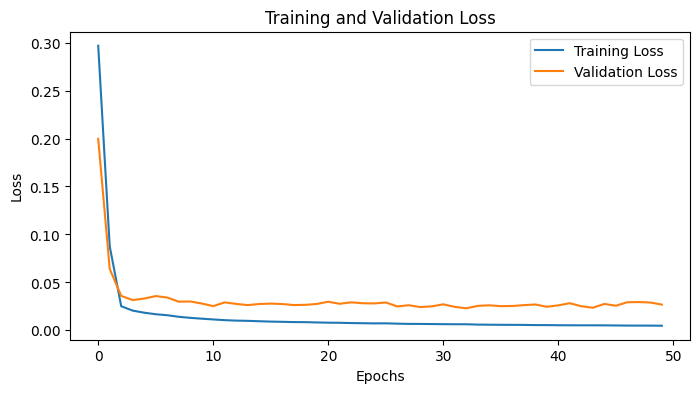

In [7]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot training loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Denoise the Signal

Predict on the training data

In [8]:
denoised_windows = model.predict(X_train)  # Shape: (950, 50, 1)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


Reconstruct the full denoised signal by averaging overlapping windows

In [9]:
denoised_signal = np.zeros(len(signal))
overlap_counts = np.zeros(len(signal))

for i in range(len(denoised_windows)):
    start_idx = i
    end_idx = i + window_size
    denoised_signal[start_idx:end_idx] += denoised_windows[i].flatten()
    overlap_counts[start_idx:end_idx] += 1

# Avoid division by zero
overlap_counts[overlap_counts == 0] = 1
denoised_signal = denoised_signal / overlap_counts

# Trim to match the original signal length
denoised_signal = denoised_signal[:len(signal)]


Plot the results

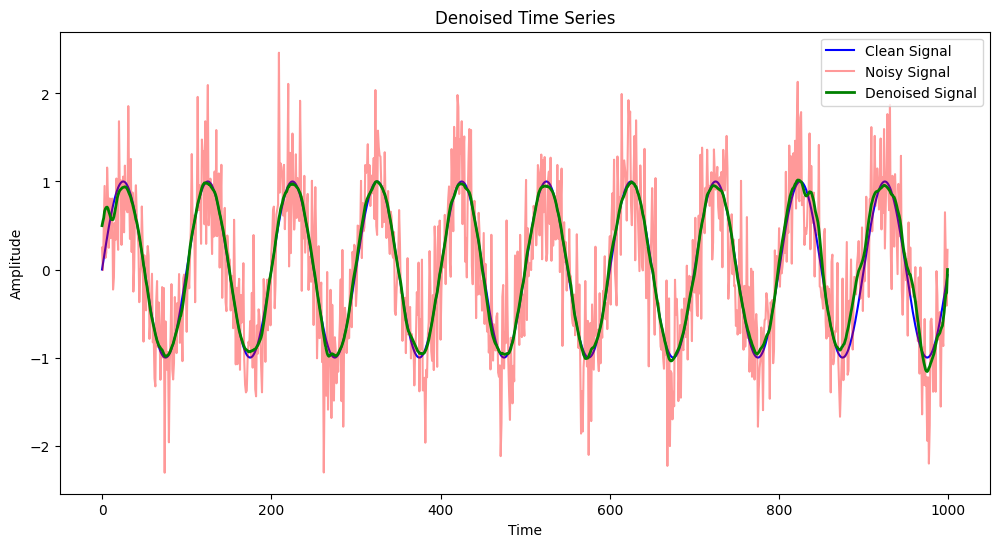

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(time, signal, label="Clean Signal", color="blue")
plt.plot(time, noisy_signal, label="Noisy Signal", color="red", alpha=0.4)
plt.plot(time, denoised_signal, label="Denoised Signal", color="green", linewidth=2)
plt.title("Denoised Time Series")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

Evaluate Performance

In [11]:
signal[window_size:]

array([-3.21624530e-16, -6.27905195e-02, -1.25333234e-01, -1.87381315e-01,
       -2.48689887e-01, -3.09016994e-01, -3.68124553e-01, -4.25779292e-01,
       -4.81753674e-01, -5.35826795e-01, -5.87785252e-01, -6.37423990e-01,
       -6.84547106e-01, -7.28968627e-01, -7.70513243e-01, -8.09016994e-01,
       -8.44327926e-01, -8.76306680e-01, -9.04827052e-01, -9.29776486e-01,
       -9.51056516e-01, -9.68583161e-01, -9.82287251e-01, -9.92114701e-01,
       -9.98026728e-01, -1.00000000e+00, -9.98026728e-01, -9.92114701e-01,
       -9.82287251e-01, -9.68583161e-01, -9.51056516e-01, -9.29776486e-01,
       -9.04827052e-01, -8.76306680e-01, -8.44327926e-01, -8.09016994e-01,
       -7.70513243e-01, -7.28968627e-01, -6.84547106e-01, -6.37423990e-01,
       -5.87785252e-01, -5.35826795e-01, -4.81753674e-01, -4.25779292e-01,
       -3.68124553e-01, -3.09016994e-01, -2.48689887e-01, -1.87381315e-01,
       -1.25333234e-01, -6.27905195e-02,  6.43249060e-16,  6.27905195e-02,
        1.25333234e-01,  

In [13]:
from sklearn.metrics import mean_squared_error
denoised_signal = denoised_signal[window_size:]
# Calculate MSE
mse = mean_squared_error(signal[window_size:], denoised_signal)
print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 0.0062


Conclusion

The neural network successfully denoised the synthetic time series.
The MSE metric quantifies the performance of the model.
This approach can be extended to real-world time series data (e.g., Langmuir probe measurements).